<a href="https://colab.research.google.com/github/moamen20/MachineLearning_SEC/blob/main/TSF_GRIP/Task6_iris/iris_decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
import sklearn.tree as tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np



In [65]:
# Loading the iris dataset
iris=datasets.load_iris()

# Forming the iris dataframe
X=pd.DataFrame(iris.data, columns=iris.feature_names)
print(X.head(5))

y=iris.target
print(y)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [66]:
X=pd.DataFrame(X)

In [67]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#check missing value
X.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [ ]:
#shape of X data
X.shape

(150, 4)

In [68]:
#Split the data into training and test data 
x_train , x_test , y_train , y_test = train_test_split(X , y 
                                                       , test_size = 0.2)

visualize the tree with the default parameters.

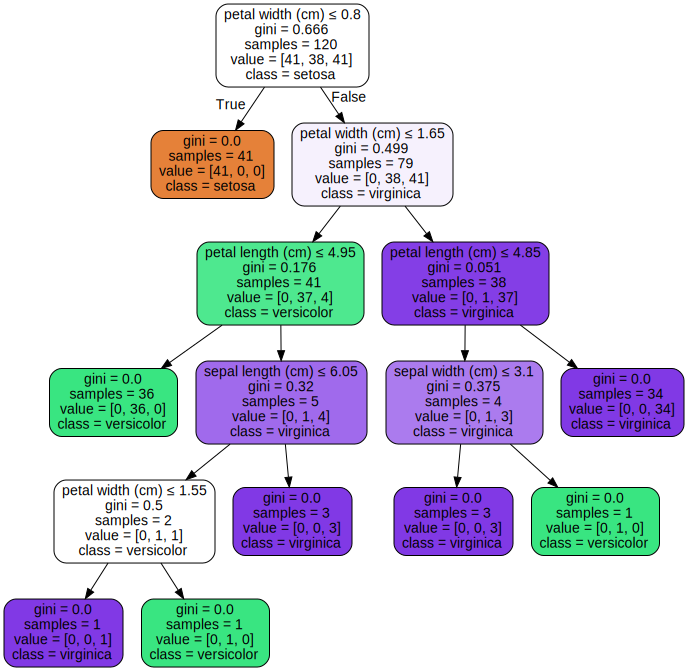

In [69]:

Dtree=DecisionTreeClassifier(random_state=0)
Dtree.fit(x_train,y_train)
DT_data = tree.export_graphviz(Dtree, out_file="tree.dot", 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)

with open("tree.dot") as T:
    DT_graph = T.read()

graphviz.Source(DT_graph)

#choosing max depth by using elbow method


In [70]:
#choose max depth 
max_depth_list = range(1,6)

train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for i in max_depth_list:
    dtc = DecisionTreeClassifier(max_depth=i,random_state=42) 
    dtc.fit(x_train,y_train)
    train_z = dtc.predict(x_train)
    test_z = dtc.predict(x_test)
    train_errors.append(1-accuracy_score(y_train, train_z))
    test_errors.append(1-accuracy_score(y_test, test_z))




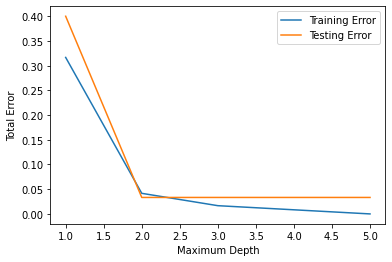

In [71]:
#plot different values of max depth with error 
range_depth= range(1,6) # Create domain for plot
plt.plot(range_depth, train_errors, label='Training Error') # Plot training error over domain
plt.plot(range_depth, test_errors, label='Testing Error') # Plot testing error over domain
plt.xlabel('Maximum Depth') # Label x-axis
plt.ylabel('Total Error') # Label y-axis
plt.legend() # Show plot labels as legend
plt.show() # Show graph

#Choosing max depth by using GridSearchCV

In [87]:
# now you can import normally from model_selection
from sklearn.model_selection import GridSearchCV

tree_param = {
    "criterion": ['entropy', 'gini'],
    "max_depth": range(1,10),  
}
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

grid = GridSearchCV(clf, param_grid=tree_param, cv=5, verbose=1, n_jobs=-1)
grid.fit(x_train,y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10)},
             verbose=1)

In [88]:
print(pd.DataFrame(grid.cv_results_).mean())
print('--------------\n')
print(pd.DataFrame(grid.cv_results_).head())

mean_fit_time        0.003425
std_fit_time         0.000965
mean_score_time      0.002420
std_score_time       0.000557
param_max_depth      5.000000
split0_test_score    0.930556
split1_test_score    0.907407
split2_test_score    0.958333
split3_test_score    0.930556
split4_test_score    0.914352
mean_test_score      0.928241
std_test_score       0.026450
rank_test_score      7.666667
dtype: float64
--------------

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.003304      0.000483         0.002072        0.000109   
1       0.002880      0.000125         0.001930        0.000052   
2       0.002817      0.000011         0.001970        0.000064   
3       0.004597      0.003509         0.003172        0.002148   
4       0.002818      0.000059         0.002095        0.000020   

  param_criterion param_max_depth                                    params  \
0         entropy               1  {'criterion': 'entropy', 'max_depth': 1}   
1         entropy 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [89]:
#print('The best etimator score result is', grid.best_estimator_.score(X, y))
# Best result considering the average value of the crossing value:
print('The best score is', grid.best_score_)
print('The best parameters:',grid.best_params_)

results = pd.DataFrame(grid.cv_results_)
results = results.iloc[:,4:]
results = results.drop(['params','split0_test_score','split1_test_score','split2_test_score','split3_test_score','split4_test_score'], axis=1)
results = results.sort_values(by='rank_test_score')
results

The best score is 0.9666666666666668
The best parameters: {'criterion': 'entropy', 'max_depth': 4}


,param_criterion,param_max_depth,mean_test_score,std_test_score,rank_test_score
3,entropy,4,0.966667,0.016667,1
4,entropy,5,0.966667,0.016667,1
14,gini,6,0.966667,0.016667,1
6,entropy,7,0.966667,0.016667,1
7,entropy,8,0.966667,0.016667,1
2,entropy,3,0.966667,0.031180,6
11,gini,3,0.966667,0.031180,6
8,entropy,9,0.958333,0.026352,8
15,gini,7,0.958333,0.026352,8
13,gini,5,0.958333,0.026352,8


#Applying decision tree model to training set

In [100]:
#apply train data to decision tree
dtree=DecisionTreeClassifier(max_depth=3,random_state=42)
dtree.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

#Apply model to test data 

In [99]:
y_pred = dtree.predict(x_test)
score = accuracy_score(y_test, y_pred)
score

0.9666666666666667

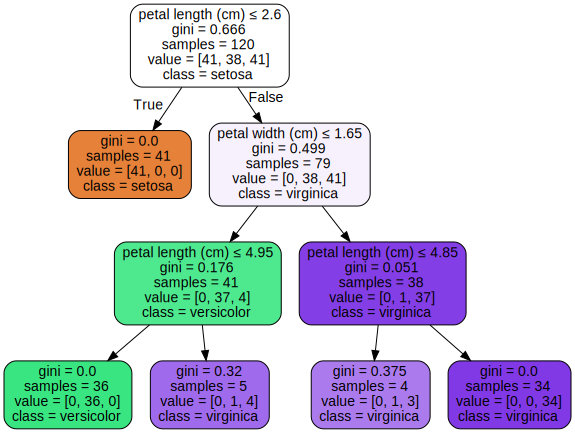

In [101]:
DT_data = tree.export_graphviz(dtree, out_file="tree.dot", 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)

with open("tree.dot") as T:
    DT_graph = T.read()

graphviz.Source(DT_graph)